<a href="https://colab.research.google.com/github/Azimoj/Commerce/blob/main/Commerce_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importation des librairies
import numpy as np
import pandas as pd
%pylab inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# <font color='green'>**Reading dataset:**</font>

In [ ]:
Customer= pd.read_csv('/content/drive/MyDrive/Commerce_DB/Customer.csv')

In [ ]:
Customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [ ]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [ ]:
Cities = pd.read_csv('/content/drive/MyDrive/Commerce_DB/Cities.csv')
Cities

,Unnamed: 0,city_code,city
0,0,1,Toulouse
1,1,2,Rennes
2,2,3,Lille
3,3,4,Bordeaux
4,4,5,Nantes
5,5,6,Paris
6,6,7,Strasbourg
7,7,8,Lyon
8,8,9,Nice
9,9,10,Marseille


In [ ]:
Cities.drop('Unnamed: 0', axis=1, inplace= True)

In [ ]:
prod_cat_info = pd.read_csv('/content/drive/MyDrive/Commerce_DB/prod_cat_info.csv')
prod_cat_info.head(5)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [ ]:
prod_cat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [ ]:
Transactions = pd.read_csv('/content/drive/MyDrive/Commerce_DB/Transactions_retail.csv')
Transactions.head(10)

,Unnamed: 0,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,online
1,1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,online
2,2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,online
3,3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,online
4,4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,online
5,5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,online
6,6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,online
7,7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,online
8,8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,store
9,9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,online


Q* Rate + Tax = **(-)** total_amt    --> rate & Q <0



Q* Rate + Tax = total_amt   --> rate & Q >0


Quantity: 	The amount purchased of a product during a transaction (negative if the order is canceled).

Rate : The unit price of a product

Total Price : The total amount of spending per order (negative if the order is canceled).

In [ ]:
Transactions.shape

(23053, 11)

In [ ]:
Transactions[Transactions["Qty"] <= 0].sort_values(by='cust_id')

,Unnamed: 0,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
18114,18114,25890929042,266783,24-09-2011,1,2,-4,-1321,554.820,-5838.820,online
12882,12882,96176911576,266785,2/6/2012,10,6,-5,-1236,648.900,-6828.900,store
4891,4891,42435707527,266794,30-06-2013,10,3,-1,-123,12.915,-135.915,online
787,787,84471719078,266799,13-01-2014,10,6,-1,-1068,112.140,-1180.140,store
3991,3991,88316484015,266816,12/8/2013,1,2,-1,-74,7.770,-81.770,online
...,...,...,...,...,...,...,...,...,...,...,...
4050,4050,84628682819,275252,9/8/2013,4,2,-2,-1281,269.010,-2831.010,online
17667,17667,56929756999,275252,14-10-2011,1,1,-4,-1307,548.940,-5776.940,online
3550,3550,96061314451,275257,3/9/2013,2,6,-3,-347,109.305,-1150.305,online
4795,4795,45067329959,275261,5/7/2013,3,5,-3,-862,271.530,-2857.530,online


In [ ]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        23053 non-null  int64  
 1   transaction_id    23053 non-null  int64  
 2   cust_id           23053 non-null  int64  
 3   tran_date         23053 non-null  object 
 4   prod_subcat_code  23053 non-null  int64  
 5   prod_cat_code     23053 non-null  int64  
 6   Qty               23053 non-null  int64  
 7   Rate              23053 non-null  int64  
 8   Tax               23053 non-null  float64
 9   total_amt         23053 non-null  float64
 10  Store_type        23053 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 1.9+ MB


In [ ]:
Transactions.drop('Unnamed: 0', axis=1 ,inplace= True)

## <font color='green'>**Merging all fies together:**</font>

In [ ]:
Transactions.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type'],
      dtype='object')

In [ ]:
prod_cat_info.columns

Index(['prod_cat_code', 'prod_cat', 'prod_sub_cat_code', 'prod_subcat'], dtype='object')

In [ ]:
Transactions = Transactions.rename(columns = {'prod_subcat_code': 'prod_sub_cat_code',
                                              'cust_id' : "customer_Id",
                                              'Rate' : "Price"})

In [ ]:
prod_cat_info = prod_cat_info.rename(columns = {'prod_subcat': 'prod_sub_cat'})

In [ ]:
Cities.columns

Index(['city_code', 'city'], dtype='object')

In [ ]:
Customer.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code'], dtype='object')

In [ ]:
# making our dataset
cities_Customer= pd.merge(Cities,Customer, on= "city_code" )
tr_Customer = Transactions.merge(cities_Customer, on="customer_Id")
data= pd.merge(tr_Customer,prod_cat_info, on= ['prod_cat_code','prod_sub_cat_code'])


In [ ]:
data.shape

(23045, 16)

In [ ]:
data.head(3)

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Price,Tax,total_amt,Store_type,city_code,city,DOB,Gender,prod_cat,prod_sub_cat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,online,5,Nantes,26-09-1981,M,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,online,5,Nantes,26-09-1981,M,Clothing,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,store,3,Lille,08-06-1981,M,Clothing,Women


In [ ]:
data.describe()

,transaction_id,customer_Id,prod_sub_cat_code,prod_cat_code,Qty,Price,Tax,total_amt,city_code
count,2.304500e+04,23045.000000,23045.000000,23045.000000,23045.000000,23045.000000,23045.000000,23045.000000,23045.000000
mean,5.007059e+10,271022.617574,6.148926,3.763506,2.432458,636.370145,248.692211,2107.394385,5.482534
std,2.898500e+10,2431.663631,3.726392,1.677127,2.268630,622.451676,187.179703,2507.779426,2.863499
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
25%,2.492256e+10,268936.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,3.000000
50%,5.008973e+10,270981.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,5.000000
75%,7.533000e+10,273115.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,10.000000


In [ ]:
data.Gender.unique()

array(['M', 'F', nan], dtype=object)

In [ ]:
data.prod_sub_cat.unique()

array(['Women', 'Personal Appliances', 'DIY', 'Computers', 'Mens',
       'Tools', 'Children', 'Fiction', 'Mobiles', 'Bath',
       'Audio and video', 'Non-Fiction', 'Kids', 'Furnishing', 'Cameras',
       'Academic', 'Kitchen', 'Comics'], dtype=object)

In [ ]:
data.prod_cat.unique()

array(['Clothing', 'Footwear', 'Electronics', 'Books', 'Bags',
       'Home and kitchen'], dtype=object)

In [ ]:
data.city.unique()

array(['Nantes', 'Lille', 'Toulouse', 'Marseille', 'Rennes', 'Lyon',
       'Nice', 'Paris', 'Strasbourg', 'Bordeaux'], dtype=object)

In [ ]:
data.Store_type.unique()

array(['online', 'store'], dtype=object)

# <font color='purple'>**Data preprocessing:**</font>



*   Data cleaning

          -Duplicate data
          -Missing values
          -Noisy data
          

*   Data reduction
          -Dimensionality reduction
          -Feature subset selection

*   Data transformation
          -Data transformation is the process of converting data from one format to another.
         -Aggregation
         -Discretization
         -Normalization
         -Feature construction


https://learn.g2.com/data-preprocessing#:~:text=Incomplete%20or%20inconsistent%20data%20can,integration%2C%20reduction%2C%20and%20transformation.

## <font color='green'>**Cleaning our dataset:**</font>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23045 entries, 0 to 23044
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     23045 non-null  int64  
 1   customer_Id        23045 non-null  int64  
 2   tran_date          23045 non-null  object 
 3   prod_sub_cat_code  23045 non-null  int64  
 4   prod_cat_code      23045 non-null  int64  
 5   Qty                23045 non-null  int64  
 6   Price              23045 non-null  int64  
 7   Tax                23045 non-null  float64
 8   total_amt          23045 non-null  float64
 9   Store_type         23045 non-null  object 
 10  city_code          23045 non-null  int64  
 11  city               23045 non-null  object 
 12  DOB                23045 non-null  object 
 13  Gender             23036 non-null  object 
 14  prod_cat           23045 non-null  object 
 15  prod_sub_cat       23045 non-null  object 
dtypes: float64(2), int64(7

### **Creating new columns as order_status:**

In [ ]:
# creating new columns if Q>0 newcolumns= 1
#data['order_status'] = data['Qty'].apply(lambda x: '{0:1}'.format(x>0))
# https://saturncloud.io/blog/how-to-create-new-pandas-column-based-on-conditions/#:~:text=To%20create%20a%20new%20Pandas,on%20the%20conditions%20you%20specify.

data['order_status'] = data.apply(lambda row: 'Complete' if row['Qty'] >= 0 else 'Refunded', axis=1)
data.head()

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Price,Tax,total_amt,Store_type,city_code,city,DOB,Gender,prod_cat,prod_sub_cat,order_status
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,online,5,Nantes,26-09-1981,M,Clothing,Women,Refunded
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,online,5,Nantes,26-09-1981,M,Clothing,Women,Complete
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,store,3,Lille,08-06-1981,M,Clothing,Women,Complete
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,store,1,Toulouse,13-10-1986,M,Clothing,Women,Refunded
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,store,1,Toulouse,13-10-1986,M,Clothing,Women,Complete


In [ ]:
data['order_status'].value_counts()

Complete    20868
Refunded     2177
Name: order_status, dtype: int64

### <font color='blue'>**Duplicate:**</font>

In [ ]:
data.duplicated(['order_status','transaction_id']).sum()

118

In [ ]:
data[data.duplicated(['order_status','transaction_id'])==True]

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Price,Tax,total_amt,Store_type,city_code,city,DOB,Gender,prod_cat,prod_sub_cat,order_status
15,42324045497,269388,11/10/2011,1,1,-4,-1095,459.900,-4839.900,online,3,Lille,14-11-1975,M,Clothing,Women,Refunded
95,63500047523,274751,27-05-2012,1,1,-4,-1300,546.000,-5746.000,online,8,Lyon,23-08-1985,F,Clothing,Women,Refunded
199,77913473190,274568,16-07-2012,1,1,-5,-935,490.875,-5165.875,store,9,Nice,12-09-1984,F,Clothing,Women,Refunded
440,7232517558,267707,8/10/2013,1,1,-1,-611,64.155,-675.155,store,2,Rennes,02-10-1970,F,Clothing,Women,Refunded
596,45975085761,270677,1/8/2012,1,1,-4,-192,80.640,-848.640,online,2,Rennes,17-07-1990,M,Clothing,Women,Refunded
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22452,57378573240,267972,17-10-2013,4,4,-3,-184,57.960,-609.960,online,8,Lyon,04-05-1974,M,Bags,Women,Refunded
22785,43292728137,267939,3/7/2011,4,4,-2,-739,155.190,-1633.190,online,1,Toulouse,18-03-1985,F,Bags,Women,Refunded
22919,44635411688,271562,15-12-2011,4,4,-2,-1325,278.250,-2928.250,online,7,Strasbourg,11-08-1986,F,Bags,Women,Refunded
22932,61167623314,274035,22-05-2011,4,4,-5,-1401,735.525,-7740.525,store,9,Nice,09-08-1976,M,Bags,Women,Refunded


In [ ]:
data[data['customer_Id']==269388]

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Price,Tax,total_amt,Store_type,city_code,city,DOB,Gender,prod_cat,prod_sub_cat,order_status
14,42324045497,269388,13-10-2011,1,1,-4,-1095,459.900,-4839.900,online,3,Lille,14-11-1975,M,Clothing,Women,Refunded
15,42324045497,269388,11/10/2011,1,1,-4,-1095,459.900,-4839.900,online,3,Lille,14-11-1975,M,Clothing,Women,Refunded
16,42324045497,269388,6/10/2011,1,1,4,1095,459.900,4839.900,online,3,Lille,14-11-1975,M,Clothing,Women,Complete
1030,20148158664,269388,9/3/2011,3,2,2,332,69.720,733.720,store,3,Lille,14-11-1975,M,Footwear,Women,Complete
4984,59547158614,269388,27-09-2013,1,4,2,396,83.160,875.160,online,3,Lille,14-11-1975,M,Bags,Mens,Complete
5991,66947374667,269388,26-09-2013,12,6,-5,-751,394.275,-4149.275,online,3,Lille,14-11-1975,M,Home and kitchen,Tools,Refunded
5992,66947374667,269388,25-09-2013,12,6,5,751,394.275,4149.275,online,3,Lille,14-11-1975,M,Home and kitchen,Tools,Complete
7047,28737771127,269388,20-11-2012,11,5,5,1015,532.875,5607.875,store,3,Lille,14-11-1975,M,Books,Children,Complete
10173,34544863855,269388,15-02-2014,11,6,2,922,193.620,2037.620,store,3,Lille,14-11-1975,M,Home and kitchen,Bath,Complete
20005,41914991024,269388,21-10-2013,10,6,4,912,383.040,4031.040,online,3,Lille,14-11-1975,M,Home and kitchen,Kitchen,Complete


In [ ]:
data[data.duplicated(['tran_date','transaction_id','order_status'])==True]


,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Price,Tax,total_amt,Store_type,city_code,city,DOB,Gender,prod_cat,prod_sub_cat,order_status
1360,44125492691,274748,19-12-2011,3,2,-5,-767,402.675,-4237.675,online,1,Toulouse,22-06-1991,M,Footwear,Women,Refunded
2866,4170892941,266852,21-12-2011,8,3,-1,-412,43.260,-455.260,store,5,Nantes,15-01-1990,M,Electronics,Personal Appliances,Refunded
2946,95523406151,273937,16-09-2012,8,3,-5,-483,253.575,-2668.575,online,5,Nantes,19-11-1975,M,Electronics,Personal Appliances,Refunded
6968,68625357665,270229,24-04-2012,12,6,-5,-79,41.475,-436.475,store,9,Nice,01-12-1977,M,Home and kitchen,Tools,Refunded
9148,48727689115,270330,21-10-2012,4,3,-4,-1158,486.360,-5118.360,online,3,Lille,13-07-1981,M,Electronics,Mobiles,Refunded
10770,54818572958,274656,19-07-2013,11,6,-5,-662,347.550,-3657.550,online,5,Nantes,03-02-1987,M,Home and kitchen,Bath,Refunded
12892,98271941861,267939,29-06-2011,10,5,-4,-1238,519.960,-5471.960,store,1,Toulouse,18-03-1985,F,Books,Non-Fiction,Refunded
18250,426787191,273106,28-05-2012,1,2,-5,-109,57.225,-602.225,online,2,Rennes,23-03-1970,F,Footwear,Mens,Refunded
18265,93088859112,272584,4/11/2012,1,2,-1,-1168,122.640,-1290.640,online,2,Rennes,20-12-1979,M,Footwear,Mens,Refunded
19905,42255136382,270202,25-08-2012,12,5,-4,-841,353.220,-3717.220,online,9,Nice,18-07-1985,F,Books,Academic,Refunded


In [ ]:
data[data['customer_Id']==274748]

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Price,Tax,total_amt,Store_type,city_code,city,DOB,Gender,prod_cat,prod_sub_cat,order_status
1359,44125492691,274748,19-12-2011,3,2,-5,-767,402.675,-4237.675,online,1,Toulouse,22-06-1991,M,Footwear,Women,Refunded
1360,44125492691,274748,19-12-2011,3,2,-5,-767,402.675,-4237.675,online,1,Toulouse,22-06-1991,M,Footwear,Women,Refunded
1361,44125492691,274748,12/12/2011,3,2,5,767,402.675,4237.675,online,1,Toulouse,22-06-1991,M,Footwear,Women,Complete
7377,10861410733,274748,18-11-2013,11,5,3,504,158.760,1670.760,store,1,Toulouse,22-06-1991,M,Books,Children,Complete
8414,35235470917,274748,8/12/2012,7,5,5,692,363.300,3823.300,store,1,Toulouse,22-06-1991,M,Books,Fiction,Complete
9431,50672237319,274748,23-10-2012,4,3,-1,-93,9.765,-102.765,store,1,Toulouse,22-06-1991,M,Electronics,Mobiles,Refunded
9432,50672237319,274748,18-10-2012,4,3,1,93,9.765,102.765,store,1,Toulouse,22-06-1991,M,Electronics,Mobiles,Complete
14449,70600390175,274748,30-05-2013,2,6,1,1021,107.205,1128.205,online,1,Toulouse,22-06-1991,M,Home and kitchen,Furnishing,Complete
16428,1453192701,274748,8/4/2012,3,1,3,607,191.205,2012.205,online,1,Toulouse,22-06-1991,M,Clothing,Kids,Complete
19346,52354235850,274748,19-08-2013,12,5,1,305,32.025,337.025,store,1,Toulouse,22-06-1991,M,Books,Academic,Complete


In [ ]:
data.drop_duplicates(['order_status','transaction_id'], inplace = True)

In [ ]:
data['order_status'].value_counts()

Complete    20868
Refunded     2059
Name: order_status, dtype: int64

In [ ]:
data.shape

(22927, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22927 entries, 0 to 23044
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     22927 non-null  int64  
 1   customer_Id        22927 non-null  int64  
 2   tran_date          22927 non-null  object 
 3   prod_sub_cat_code  22927 non-null  int64  
 4   prod_cat_code      22927 non-null  int64  
 5   Qty                22927 non-null  int64  
 6   Price              22927 non-null  int64  
 7   Tax                22927 non-null  float64
 8   total_amt          22927 non-null  float64
 9   Store_type         22927 non-null  object 
 10  city_code          22927 non-null  int64  
 11  city               22927 non-null  object 
 12  DOB                22927 non-null  object 
 13  Gender             22918 non-null  object 
 14  prod_cat           22927 non-null  object 
 15  prod_sub_cat       22927 non-null  object 
 16  order_status       229

### <font color='blue'>**Missing Values:**</font>

<Axes: >

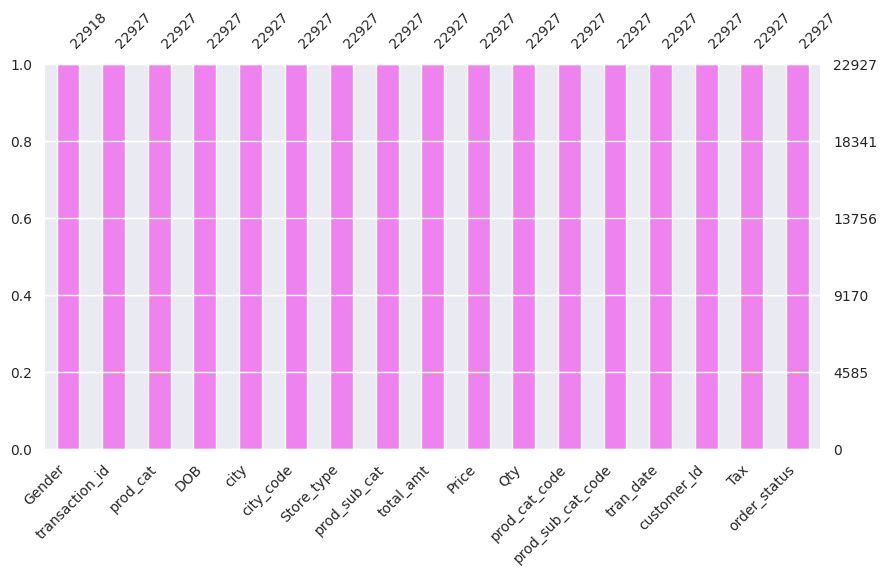

In [ ]:
# cheking null values
import missingno
missingno.bar(data,color="violet", sort="ascending", figsize=(10,5),fontsize=10)

In [ ]:
data[data['Gender'].isnull()]

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Price,Tax,total_amt,Store_type,city_code,city,DOB,Gender,prod_cat,prod_sub_cat,order_status
325,85496594077,267199,27-11-2013,1,1,-4,-366,153.720,-1617.720,online,2,Rennes,14-02-1970,NaN,Clothing,Women,Refunded
326,85496594077,267199,24-11-2013,1,1,4,366,153.720,1617.720,online,2,Rennes,14-02-1970,NaN,Clothing,Women,Complete
3331,5723163001,267199,15-08-2013,6,5,1,244,25.620,269.620,online,2,Rennes,14-02-1970,NaN,Books,DIY,Complete
7824,78371516927,271626,29-06-2012,11,5,3,1022,321.930,3387.930,online,6,Paris,02-06-1970,NaN,Books,Children,Complete
8391,56749259881,267199,11/1/2012,7,5,4,1049,440.580,4636.580,store,2,Rennes,14-02-1970,NaN,Books,Fiction,Complete
10939,55955314599,271626,20-03-2013,11,6,5,1039,545.475,5740.475,online,6,Paris,02-06-1970,NaN,Home and kitchen,Bath,Complete
12882,51951874983,271626,20-12-2012,10,5,4,845,354.900,3734.900,online,6,Paris,02-06-1970,NaN,Books,Non-Fiction,Complete
13893,24340761293,271626,5/6/2012,4,2,3,769,242.235,2549.235,store,6,Paris,02-06-1970,NaN,Footwear,Kids,Complete
16410,29245958438,267199,7/2/2011,3,1,1,278,29.190,307.190,online,2,Rennes,14-02-1970,NaN,Clothing,Kids,Complete


In [ ]:
data['Gender'].value_counts()

M    11744
F    11174
Name: Gender, dtype: int64

In [ ]:
data['Gender']= data['Gender'].fillna(data['Gender'].mode()[0])

### <font color='blue'>**Outliers:**</font>

In [ ]:
data.describe()

,transaction_id,customer_Id,prod_sub_cat_code,prod_cat_code,Qty,Price,Tax,total_amt,city_code
count,2.292700e+04,22927.000000,22927.000000,22927.000000,22927.000000,22927.000000,22927.000000,22927.000000,22927.000000
mean,5.005818e+10,271023.015353,6.149823,3.763423,2.460505,643.791381,248.640156,2132.258548,5.480700
std,2.898748e+10,2431.368070,3.725385,1.677096,2.238018,614.635963,187.094898,2485.388422,2.863625
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
25%,2.487848e+10,268938.000000,3.000000,2.000000,1.000000,318.000000,98.280000,777.920000,3.000000
50%,5.008377e+10,270981.000000,5.000000,4.000000,3.000000,715.000000,199.080000,1773.525000,5.000000
75%,7.531544e+10,273115.000000,10.000000,5.000000,4.000000,1111.000000,365.400000,3584.620000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,10.000000


### **Check for outlier on total amount of sell**

Text(0.5, 0, '')

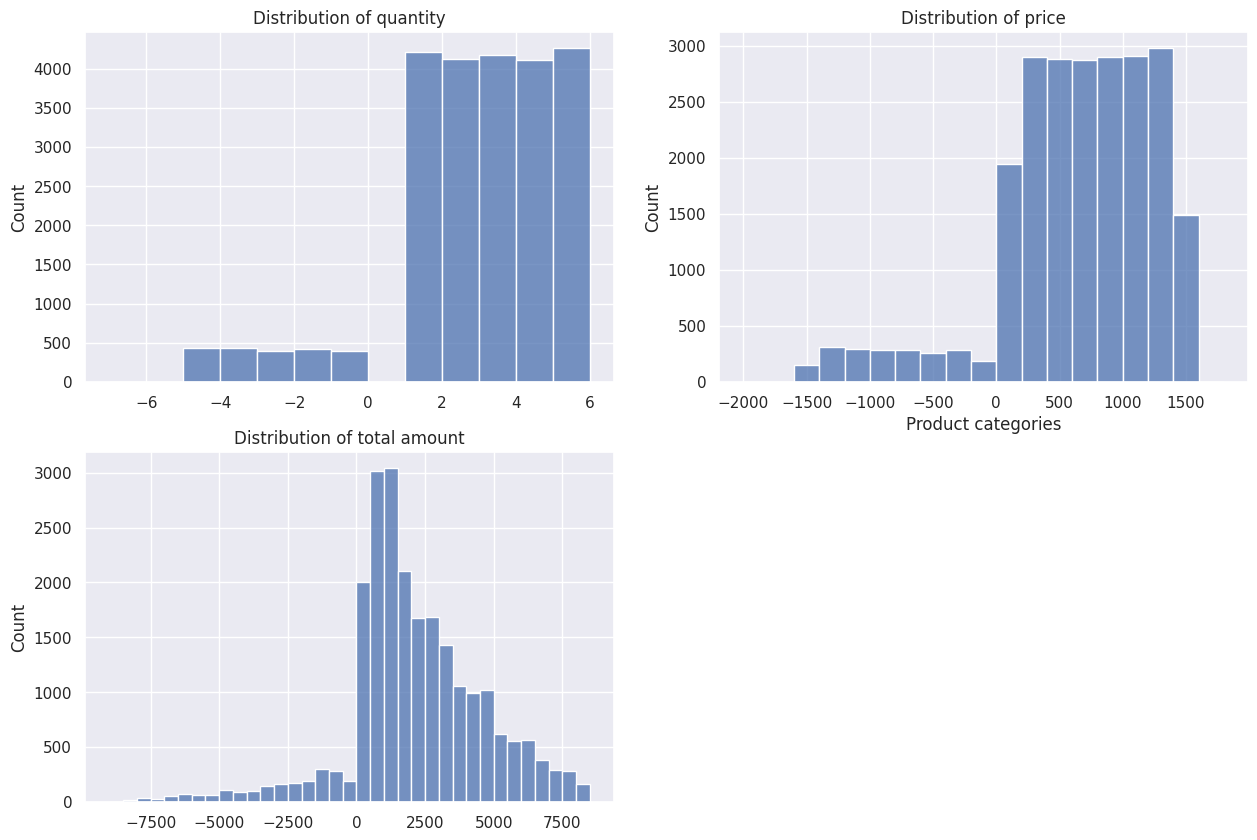

In [ ]:
sns.set(font_scale=1.0)
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.histplot(data=data, x="Qty", bins = list(range(-7, 7, 1)))
plt.title("Distribution of quantity")
plt.xlabel('')

plt.subplot(2,2,2)
sns.histplot(data=data, x="Price", bins = list(range(-2000, 2000, 200)))
plt.title("Distribution of price")
plt.xlabel('Product categories')

plt.subplot(2,2,3)
sns.histplot(data=data, x="total_amt", bins = list(range(-9000, 9000, 500)))
plt.title("Distribution of total amount")
plt.xlabel('')

Text(0.5, 0, '')

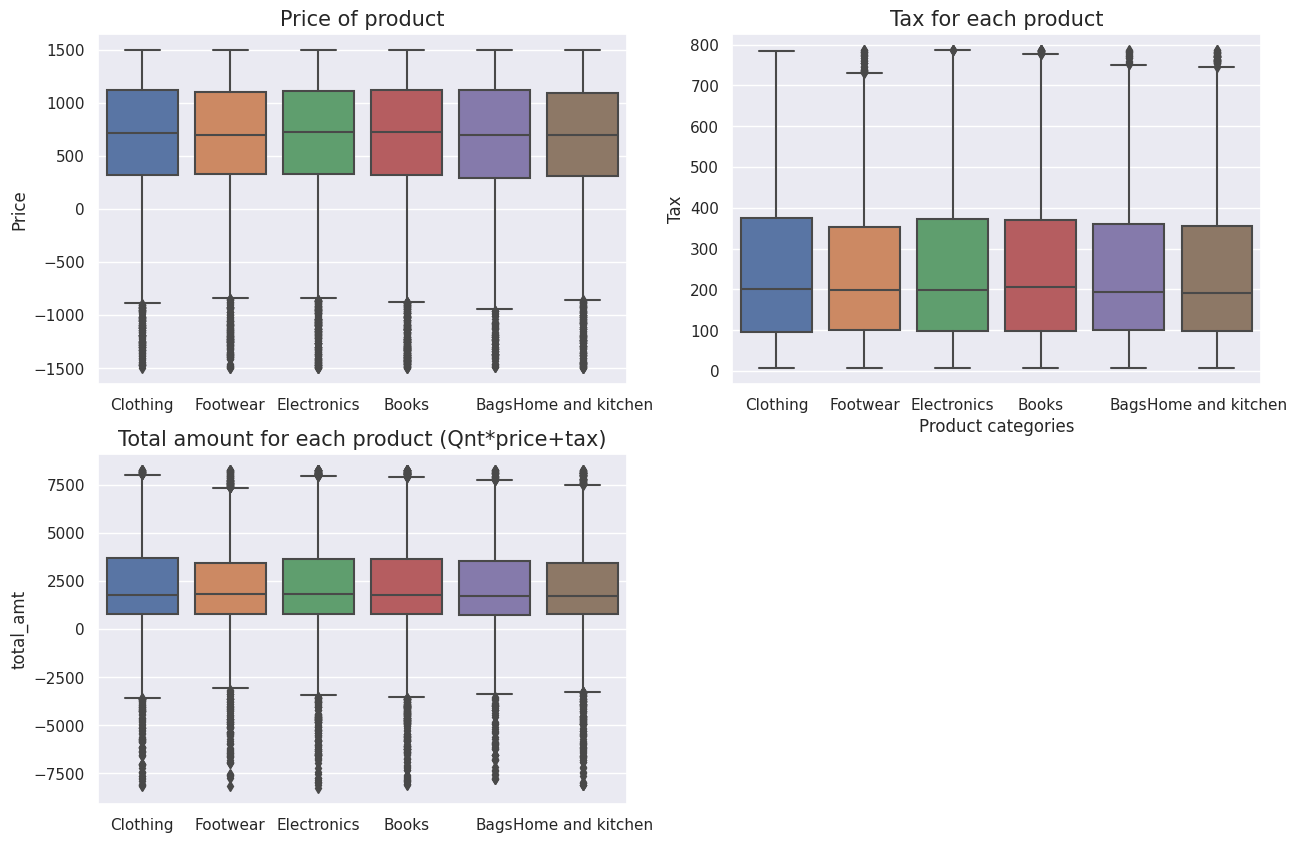

In [ ]:
sns.set(font_scale=1.0)
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(data=data, x="prod_cat", y='Price')
plt.title("Price of product", fontsize=15)
plt.xlabel('')

plt.subplot(2,2,2)
sns.boxplot(data=data, x="prod_cat", y='Tax')
plt.title("Tax for each product", fontsize=15)
plt.xlabel('Product categories')

plt.subplot(2,2,3)
sns.boxplot(data=data, x="prod_cat", y='total_amt')
plt.title("Total amount for each product (Qnt*price+tax)", fontsize=15)
plt.xlabel('')


In [ ]:
df=data.copy()

In [ ]:
df.columns

Index(['transaction_id', 'customer_Id', 'tran_date', 'prod_sub_cat_code',
       'prod_cat_code', 'Qty', 'Price', 'Tax', 'total_amt', 'Store_type',
       'city_code', 'city', 'DOB', 'Gender', 'prod_cat', 'prod_sub_cat',
       'order_status'],
      dtype='object')

In [ ]:
df.total_amt.describe()

count    22927.000000
mean      2132.258548
std       2485.388422
min      -8270.925000
25%        777.920000
50%       1773.525000
75%       3584.620000
max       8287.500000
Name: total_amt, dtype: float64

In [ ]:
df[df['total_amt']> 8000].shape

(161, 18)

In [ ]:
df[df['total_amt']< -8000].shape

(15, 18)

In [ ]:
df[df['transaction_id']== 29258453508]

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Price,Tax,total_amt,Store_type,city_code,city,DOB,Gender,prod_cat,prod_sub_cat,order_status
4014,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,online,8,Lyon,11-05-1973,F,Electronics,Computers,Refunded
4015,29258453508,270384,20-02-2014,5,3,5,1497,785.925,8270.925,online,8,Lyon,11-05-1973,F,Electronics,Computers,Complete


In [ ]:
# IQR
# Calculate the upper and lower limits
Q1 = df['total_amt'].quantile(0.25)
Q3 = df['total_amt'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_bound = np.where(df['total_amt']>=upper)[0]
lower_bound = np.where(df['total_amt']<=lower)[0]



In [ ]:
Q1 = df['total_amt'].quantile(q=.25)
Q3 = df['total_amt'].quantile(q=.75)
IQR =Q3-Q1

outliers= (df['total_amt'] < (Q1-1.5*IQR)) | (df['total_amt'] > (Q3+1.5*IQR))
outliers.sum()

898

In [ ]:
df_no_out = df[~((df['total_amt'] < (Q1-1.5*IQR)) | (df['total_amt'] > (Q3+1.5*IQR)))]

Text(0.5, 0, '')

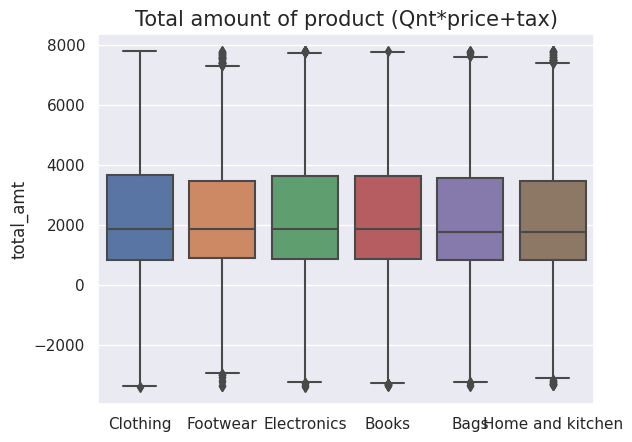

In [ ]:
sns.boxplot(data=df_no_out, x="prod_cat", y='total_amt')
plt.title("Total amount of product (Qnt*price+tax)", fontsize=15)
plt.xlabel('')

### **Analyse of client on complete status**

In [ ]:
df_complete= df[df["order_status"]=='Complete']

Text(0.5, 0, '')

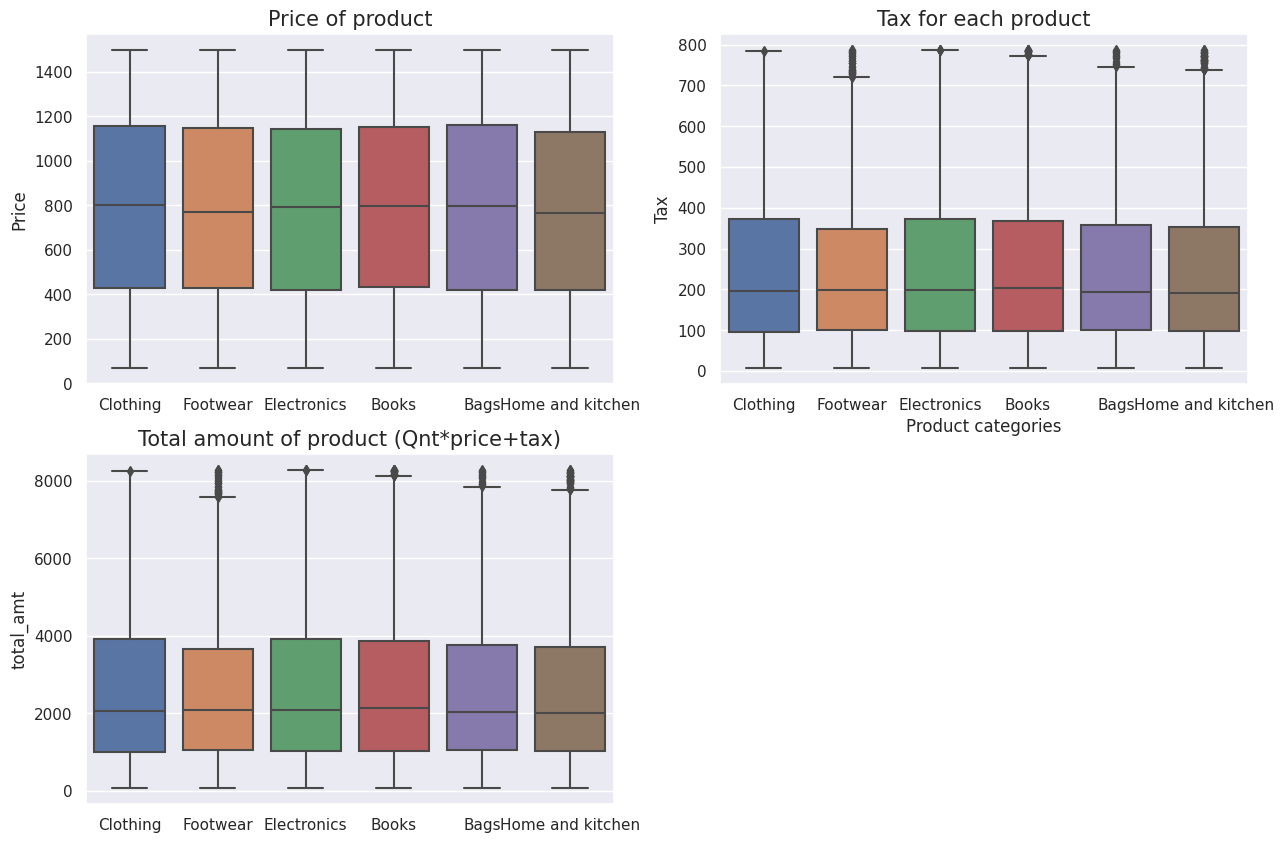

In [ ]:
sns.set(font_scale=1.0)
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(data=df_complete, x="prod_cat", y='Price')
plt.title("Price of product", fontsize=15)
plt.xlabel('')

plt.subplot(2,2,2)
sns.boxplot(data=df_complete, x="prod_cat", y='Tax')
plt.title("Tax for each product", fontsize=15)
plt.xlabel('Product categories')

plt.subplot(2,2,3)
sns.boxplot(data=df_complete, x="prod_cat", y='total_amt')
plt.title("Total amount of product (Qnt*price+tax)", fontsize=15)
plt.xlabel('')

### **Transaction period:**

In [ ]:
df['DOB'] = pd.to_datetime(df['DOB'])
df['tran_date'] = pd.to_datetime(df['tran_date'])

In [ ]:
df["tran_date"].min(), df["tran_date"].max()

(Timestamp('2011-01-02 00:00:00'), Timestamp('2014-12-02 00:00:00'))

In [ ]:
day_num=  df["tran_date"].max() - df["tran_date"].min()
day_num

Timedelta('1430 days 00:00:00')

In [ ]:
! pip install timedelta

  Preparing metadata (setup.py) ... done
  Created wheel for timedelta: filename=timedelta-2020.12.3-py3-none-any.whl size=1554 sha256=173193f1eb234364afd986cd7fcaad7964c1773dd31cd698228b6cc425d17e28
  Stored in directory: /root/.cache/pip/wheels/be/c0/1f/843bd73679dc7dfb26758c4effc6e273d3eebf2da2a35082b1
Successfully built timedelta


In [ ]:
import timedelta

td = timedelta.Timedelta(day_num)

# init from datetime.timedelta
td

Timedelta(days=1430)

In [ ]:
d= 1430
years = d // 365
months = (d - years *365) // 30
days = (d - years * 365 - months*30)

In [ ]:
#Tranaction period:
print("Period of the tranation is ",years,"years", months,"months", days,"days")

Period of the tranation is  3 years 11 months 5 days


### **Age calculation:**

In [ ]:
from datetime import datetime
from datetime import date


# This function converts given date to age
def age(born):
    born = datetime.strptime(str(born), '%Y-%m-%d %H:%M:%S').date()
    my_date = date(2015, 3, 1)

    return my_date.year - born.year - ((my_date.month,  my_date.day) < (born.month, born.day))

In [ ]:
df['client_age'] = df['DOB'].apply(age)
df.head()

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Price,Tax,total_amt,Store_type,city_code,city,DOB,Gender,prod_cat,prod_sub_cat,order_status,client_age
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,online,5,Nantes,1981-09-26,M,Clothing,Women,Refunded,33
1,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,online,5,Nantes,1981-09-26,M,Clothing,Women,Complete,33
2,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,store,3,Lille,1981-08-06,M,Clothing,Women,Complete,33
3,92814475704,267750,2013-08-16,1,1,-4,-284,119.280,-1255.280,store,1,Toulouse,1986-10-13,M,Clothing,Women,Refunded,28
4,92814475704,267750,2013-07-08,1,1,4,284,119.280,1255.280,store,1,Toulouse,1986-10-13,M,Clothing,Women,Complete,28


Text(0.5, 1.0, "Distribution of Customer's Age")

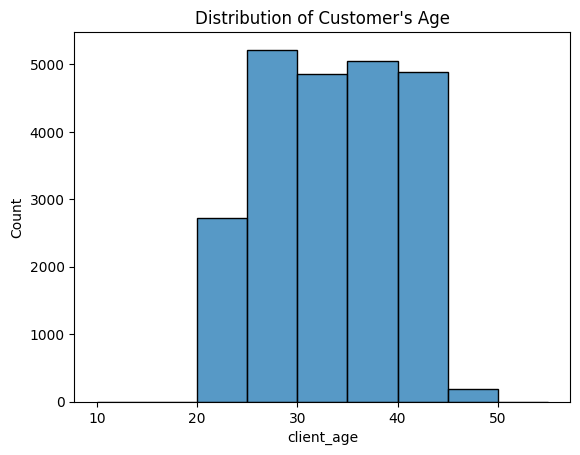

In [ ]:
sns.histplot(data=df, x="client_age", bins = list(range(10, 60, 5)))
plt.title("Distribution of Customer's Age")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22927 entries, 0 to 23044
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     22927 non-null  int64         
 1   customer_Id        22927 non-null  int64         
 2   tran_date          22927 non-null  datetime64[ns]
 3   prod_sub_cat_code  22927 non-null  int64         
 4   prod_cat_code      22927 non-null  int64         
 5   Qty                22927 non-null  int64         
 6   Price              22927 non-null  int64         
 7   Tax                22927 non-null  float64       
 8   total_amt          22927 non-null  float64       
 9   Store_type         22927 non-null  object        
 10  city_code          22927 non-null  int64         
 11  city               22927 non-null  object        
 12  DOB                22927 non-null  datetime64[ns]
 13  Gender             22927 non-null  object        
 14  prod_c

### **Check of outlier for categorical variable**

In [ ]:
df.Gender.value_counts()

M    11753
F    11174
Name: Gender, dtype: int64

In [ ]:
df.city.value_counts()

Bordeaux      2415
Lille         2400
Nantes        2347
Strasbourg    2339
Marseille     2323
Lyon          2313
Rennes        2262
Toulouse      2246
Nice          2164
Paris         2118
Name: city, dtype: int64

In [ ]:
df.Store_type.value_counts()

online    13737
store      9190
Name: Store_type, dtype: int64

In [ ]:
df.prod_cat.value_counts()

Books               6038
Electronics         4874
Home and kitchen    4105
Footwear            2980
Clothing            2946
Bags                1984
Name: prod_cat, dtype: int64

In [ ]:
df.prod_sub_cat.value_counts()

Women                  3029
Mens                   2896
Kids                   1985
Tools                  1054
Fiction                1041
Kitchen                1035
Children               1030
Mobiles                1028
Comics                 1022
Bath                   1016
Non-Fiction            1000
Furnishing             1000
DIY                     985
Cameras                 980
Personal Appliances     965
Academic                960
Computers               954
Audio and video         947
Name: prod_sub_cat, dtype: int64

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'transaction_id'),
  Text(1.5, 0, 'customer_Id'),
  Text(2.5, 0, 'prod_sub_cat_code'),
  Text(3.5, 0, 'prod_cat_code'),
  Text(4.5, 0, 'Qty'),
  Text(5.5, 0, 'Price'),
  Text(6.5, 0, 'Tax'),
  Text(7.5, 0, 'total_amt'),
  Text(8.5, 0, 'city_code'),
  Text(9.5, 0, 'client_age')])

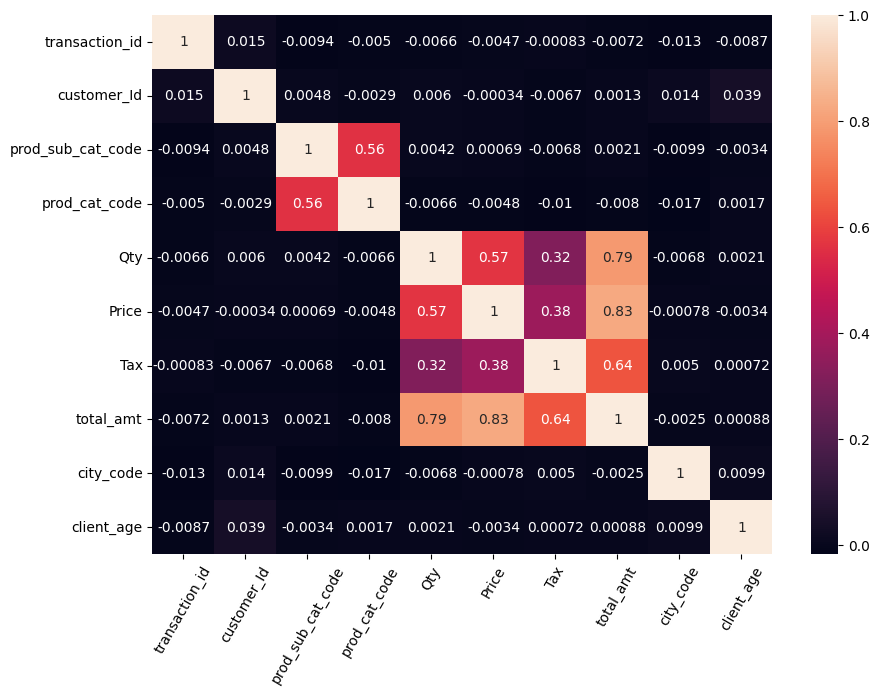

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(),annot = True)
plt.xticks(rotation  = 60)

#### <font color='red'>**Saving dataset:**</font>

In [ ]:
df.to_csv('/content/drive/My Drive/Commerce_DB/data_clean.csv', index=False)